#  Modélisation des Séries Temporelles avec ARIMA

### **Objectif :**
* Comprendre les concepts de base de la modélisation des séries temporelles avec ARIMA.
* Apprendre à sélectionner les paramètres ARIMA appropriés.
* Effectuer des prévisions sur une série temporelle.


### **Partie 1: Analyse de la série temporelle**`

1. Importer des bibliothèques nécessaires

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import matplotlib.pyplot as plt


1. Importer la base de données
**N.B :** Définir des nouveaux noms de colonnes pour la Data Frame:
* date
* value

Utiliser aussi :
* **header = 0 :** Cela indique que la première ligne du fichier CSV contient les noms des colonnes.

* **parse_dates = [0] :** Cette option spécifie quelle colonne doit être interprétée comme des dates. Dans ce cas, la colonne 0 (la première colonne) du fichier CSV sera interprétée comme des dates. Cela signifie que pandas convertira automatiquement les valeurs de cette colonne en objets datetime de Python lors du chargement du fichier CSV

In [5]:
df = pd.read_csv("Electric_Production.csv", names = ["date", "value"], header = 0, parse_dates = [0])

2. Affichez les premières lignes du jeu de données pour comprendre sa structure.

In [6]:
df.head()

,date,value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


3. Tracez la série temporelle pour visualiser ses tendances.

<Axes: >

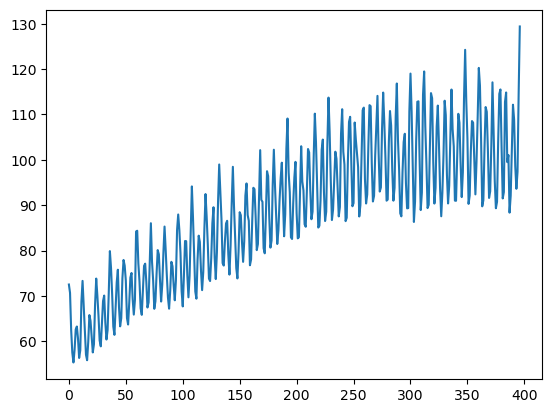

In [7]:
df['value'].plot()

4. Calculer le moyenne et l'Écart type de la série

In [10]:
df['rolling_mean'] = df['value'].rolling(window=12).mean()
df['rolling_std'] = df['value'].rolling(window=12).std()

5. Afficher la serie originale, le moyenne et l'Écart type dans le meme graphe
6. Déduire la type de la série

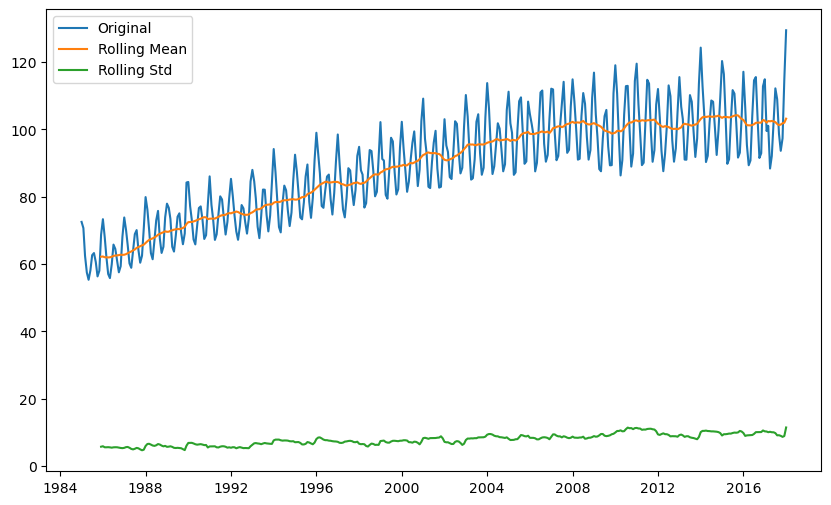

In [12]:
plt.figure(figsize = (10,6))
plt.plot(df['date'],df['value'], label='Original')
plt.plot(df['date'],df['rolling_mean'], label='Rolling Mean')
plt.plot(df['date'],df['rolling_std'],label='Rolling Std')
plt.legend(loc = 'upper left')
plt.show()

7. Faire la décomposition de la série avec les 2 modèles.

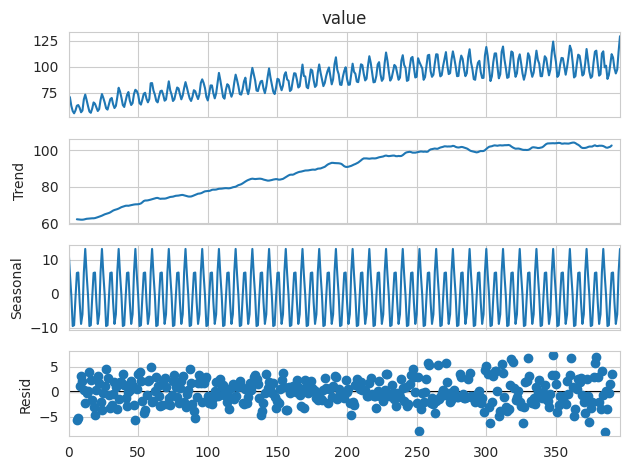

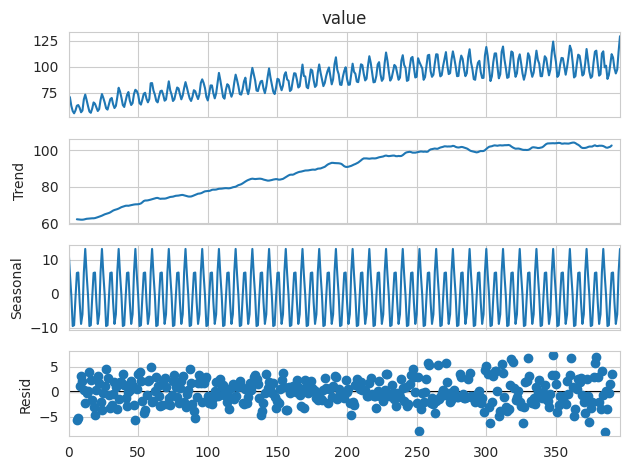

In [13]:

decAdd =seasonal_decompose(df['value'],period = 12)
decAdd.plot()

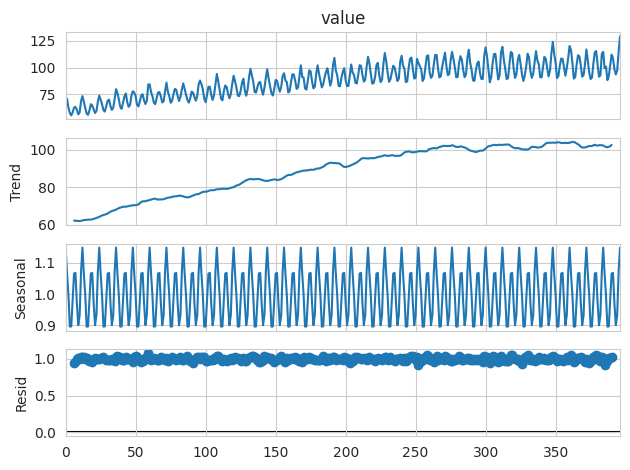

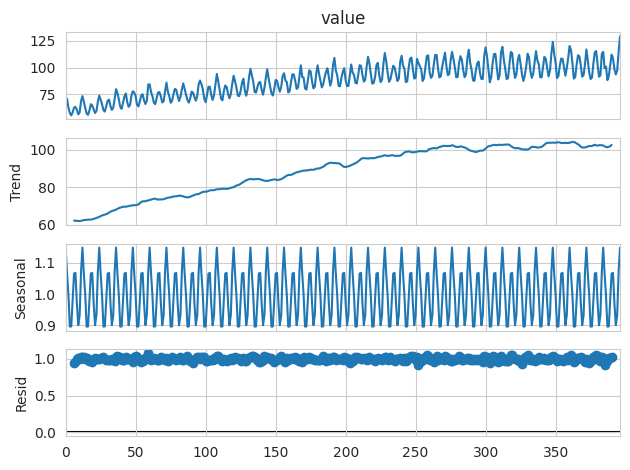

In [ ]:
dec =seasonal_decompose(df['value'],period = 12,model='multiplcative')
dec.plot()

### **Partie 2: Vérifier la stationarité de la série temporelle**

8. Vérifiez si la série est stationnaire à l'aide du **test de Dickey Fuller augmenté (test ADF)**, du statsmodels.

* La raison en est que nous n'avons besoin de différencier que si la série est non stationnaire. Dans le cas contraire, aucune différenciation n'est nécessaire, c'est-à-dire que d=0.
* L'hypothèse nulle (Ho) du test ADF est que la série temporelle n'est pas stationnaire.
* Si la valeur p du test est inférieure au seuil de signification (0,05), nous rejetons l'hypothèse nulle et en déduisons que la série temporelle est effectivement stationnaire.
* Si la valeur P est supérieure à 0,05, nous continuons à rechercher l'ordre de différenciation.
* Utiliser : from statsmodels.tsa.stattools import   


In [14]:
testStationarite = adfuller(df['value'])
testStationarite[1]  #le value de p-value existe dans la case 1 de test ADF

0.1862146911658712

9. Que remarquez-vous?

In [ ]:
# Le p-value >0.05 donc la serie temporelle n'est pas stationnaire

* Si la série n'est pas stationnaire, il faut appliquer des transformations pour la rendre stationnaire.
* La différenciation d'une série temporelle est une technique pour stabiliser la moyenne d'une série temporelle en soustrayant chaque observation de la suivante. **La méthode diff()** est utilisée pour calculer la différence entre chaque observation successive.

In [15]:
df['diff'] = df['value'].diff()
df.head()

,date,value,rolling_mean,rolling_std,diff
0,1985-01-01,72.5052,NaN,NaN,NaN
1,1985-02-01,70.6720,NaN,NaN,-1.8332
2,1985-03-01,62.4502,NaN,NaN,-8.2218
3,1985-04-01,57.4714,NaN,NaN,-4.9788
4,1985-05-01,55.3151,NaN,NaN,-2.1563


Calculer le moyenne et l'Écart type de la série apres la différenciation

In [16]:
df['mean_diff'] = df['diff'].rolling(window=12).mean()
df['std_diff'] = df['diff'].rolling(window=12).std()

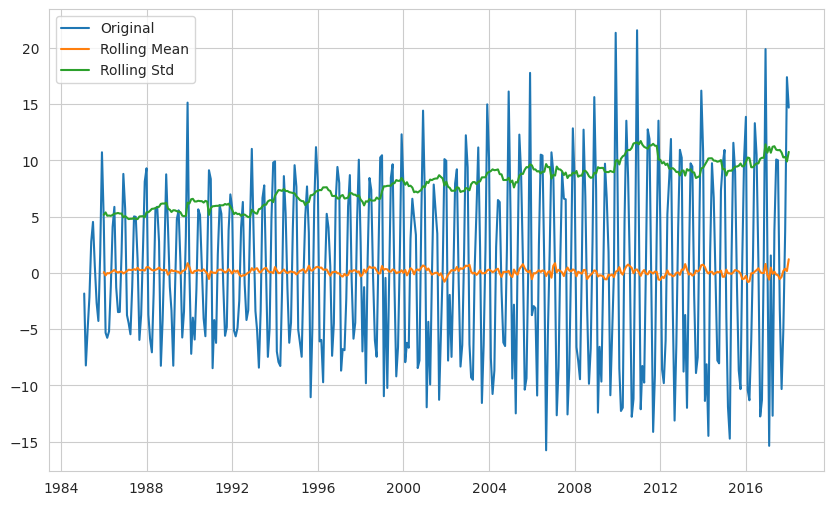

In [17]:
plt.figure(figsize = (10,6))
plt.plot(df['date'],df['diff'], label='Original')
plt.plot(df['date'],df['mean_diff'], label='Rolling Mean')
plt.plot(df['date'],df['std_diff'],label='Rolling Std')
plt.legend(loc = 'upper left')
plt.show()

# Comment trouver les ordres de ARIMA ?

10. Installer pmdarima

* **La bibliothèque pmdarima**, abréviation de "Pyramid's ARIMA", est une bibliothèque Python open-source qui fournit des fonctionnalités pour la modélisation et la prévision des séries temporelles à l'aide du modèle ARIMA (Auto-Regressive Integrated Moving Average) ainsi que de ses variantes comme SARIMA (Seasonal ARIMA).

des fonctionnalités principales de pmdarima :

1. **Auto-ARIMA :** pmdarima propose une fonction auto_arima qui permet d'effectuer une recherche automatique des paramètres optimaux du modèle ARIMA pour une série temporelle donnée. Cette fonctionnalité est particulièrement utile pour les utilisateurs qui ne sont pas familiers avec la modélisation des séries temporelles ou qui souhaitent automatiser le processus de sélection des paramètres.

2. **Modèles ARIMA :** pmdarima offre une interface facile à utiliser pour créer, ajuster et utiliser des modèles ARIMA sur des séries temporelles. Il prend en charge les modèles ARIMA univariés ainsi que les modèles SARIMA pour les séries temporelles saisonnières.

3. **Prévision :** La bibliothèque permet également de générer des prévisions à partir des modèles ARIMA ajustés, ce qui est essentiel pour la prise de décision basée sur les données dans de nombreux domaines, tels que les finances, la météo, la vente au détail, etc.

4. **Diagnostic :** pmdarima fournit des outils pour diagnostiquer les modèles ARIMA, y compris l'analyse des résidus pour vérifier l'adéquation du modèle aux données observées.

5. **Traitement des données manquantes :**  Il offre des fonctionnalités pour gérer les données manquantes dans les séries temporelles, ce qui est courant dans de nombreux ensembles de données temporelles réelles.

In [18]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.1 MB ? eta -:--:--
     ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.2/2.1 MB 5.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 1.5/2.1 MB 21.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


11. Rechercher les paramètre de modèle ARIMA




In [20]:
from pmdarima import auto_arima
model = auto_arima(df['value'], trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2431.710, Time=0.45 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=0.31 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2359.635, Time=0.50 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=2

15. Créer le modèle ARIMA en important statsmodels.tsa.arima.model et en faisant l'appel à la fonction ARIMA( X, order())
16. Fit le modèle
17. Afficher le resumé avec summary()

In [26]:
# Fit le modèle

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['value'], order=(2, 1, 4))
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  397
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -1028.613
Date:                Mon, 06 May 2024   AIC                           2071.226
Time:                        14:49:41   BIC                           2099.096
Sample:                             0   HQIC                          2082.267
                                - 397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9986      0.002    521.768      0.000       0.995       1.002
ar.L2         -0.9994      0.001   -857.337      0.000      -1.002      -0.997
ma.L1         -1.3147      0.041    -32.319      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


17. Afficher les residuals à partir de modèle précédent. ( mettre les residuals sous forme de dataframe)

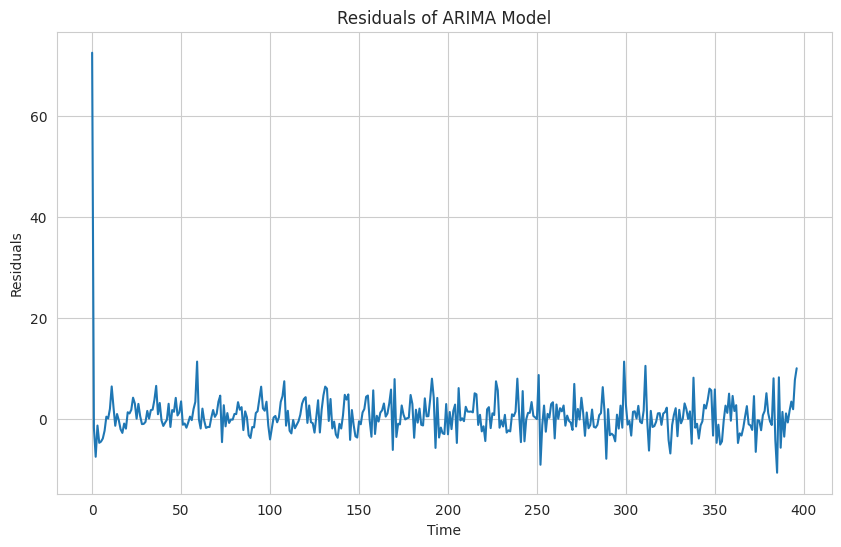

In [27]:
# Visualisation des résidus
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

18. Faire le prévision pour les 12 prochains mois avec la fonction .forecast(periode) dans une nouvelle dataframe

In [28]:
forecast = model_fit.forecast(12)  # Prévision pour les 12 prochains mois


In [29]:
forecast

397    119.375171
398    103.260632
399     94.357001
400     97.685450
401    109.907600
402    118.785792
403    115.436272
404    103.218507
405     94.365751
406     97.736289
407    109.949621
408    118.776944
Name: predicted_mean, dtype: float64

19. Faire l'affichage de resultats : actual and forcasted

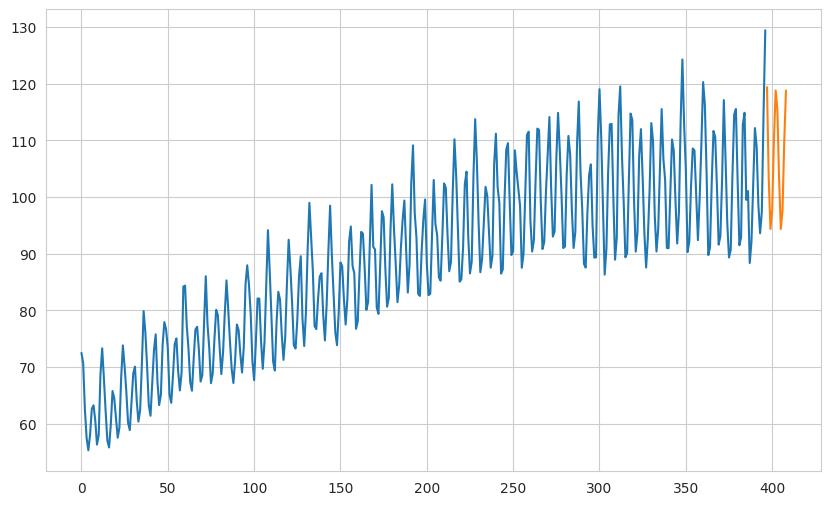

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df['value'], label='Actual')
plt.plot(forecast, label='Forecast')

